<a href="https://colab.research.google.com/github/Syc056/Deep-Learning-with-Python/blob/main/DeepLearningWithPython3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 영화리뷰 문제 : 이진 분류 예제

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# num_words == 자주나타나는 10000개의 단어만 사용할것

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])
# 자주 사용하는 단어 10000개로 제한했기에 단어 인덱스는 9999개를 넘기지 않는다.

9999

In [ ]:
word_index = imdb.get_word_index()
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리

reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
# 정수 인덱스와 단어를 매핑하도록 뒤집는다.

decoded_reivew = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])
# 리뷰를 디코딩한다. 0,1,2는 패딩, 문서시작, 사전에 없음을 위한 인덱스 이므로 3을 뺀다.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

# 원핫인코딩

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 모델 정의하기

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 확률을 출력하는 모델을 사용할때 최선의 loss는 crossentropy

In [ ]:
# 검증세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 모델 훈련하기

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 45ms/step - loss: 0.5543 - accuracy: 0.7751 - val_loss: 0.4280 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3459 - accuracy: 0.8980 - val_loss: 0.3387 - val_accuracy: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2547 - accuracy: 0.9187 - val_loss: 0.2886 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1982 - accuracy: 0.9352 - val_loss: 0.2750 - val_accuracy: 0.8921
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1627 - accuracy: 0.9482 - val_loss: 0.2779 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1333 - accuracy: 0.9573 - val_loss: 0.2795 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1110 - accuracy: 0.9675 - val_loss: 0.2921 - val_accuracy: 0.8881
Epoch 8/20
30

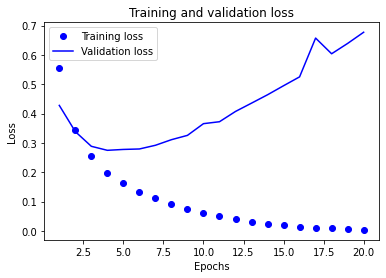

In [ ]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

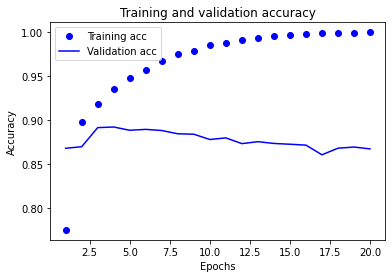

In [ ]:
# 훈련과 검증 정확도 그리기

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 위의 그래프에서 보면 epochs 수가 늘어갈수록 accuracy가 낮아 지는것을 볼 수 있다.
# 이를 통해서 적절한 epochs 수를 알아 낼 수 있으며, 이를 통해 얻어낸 epochs 수 대로 다시 훈련시킨다.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4344 - accuracy: 0.8250
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2487 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1979 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2962 - accuracy: 0.8828


In [ ]:
results

[0.29621049761772156, 0.8827599883079529]

In [ ]:
# 훈련된 모델을 새로운 데이터에 대해 예측하기
model.predict(x_test)

array([[0.13103463],
       [0.9994772 ],
       [0.8723109 ],
       ...,
       [0.11959124],
       [0.06013499],
       [0.48586753]], dtype=float32)